# Equalize360

Load the Data: Load the data from the Excel file into a Pandas DataFrame:

In [ ]:
import pandas as pd

# Load the data
df = pd.read_excel("/content/gender-equlity.xlsx")


Create the Dashboard & Display Information Based on Selection:

In [ ]:
import ipywidgets as widgets

# Dropdown for selecting country
country_dropdown = widgets.Dropdown(
    options=df['Country'].unique(),
    description='Country:',
    disabled=False,
)

# Dropdown for selecting information type
info_type_dropdown = widgets.Dropdown(
    options=['WORK', 'MONEY', 'KNOWLEDGE', 'TIME', 'POWER', 'HEALTH'],
    description='Information Type:',
    disabled=False,
)

# Submit button
submit_button = widgets.Button(description='Submit')

# Output widget for displaying the result
output = widgets.Output()

# Function to display information when submit button is clicked
def on_submit_button_clicked(b):
    with output:
        output.clear_output()
        display_info(country_dropdown.value, info_type_dropdown.value)

# Assign the function to the button's on_click event
submit_button.on_click(on_submit_button_clicked)

# Function to display information based on selections
def display_info(country, info_type):
    filtered_df = df[df['Country'] == country]
    if info_type == 'Overall Score':
        display(filtered_df[['Country', 'Gender Equality Index']])
    elif info_type in filtered_df.columns:
        display(filtered_df[['Country', info_type]])
    else:
        with output:
            print(f"No data available for {info_type} in {country}.")

# Display the widgets
display(widgets.VBox([country_dropdown, info_type_dropdown, submit_button, output]))


In [ ]:
!pip install plotly geopandas


In [ ]:
import plotly.express as px
import geopandas as gpd

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<ipython-input-4-f30d44744533>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [ ]:
# Merge with your DataFrame based on country names
merged_data = world.merge(df, how='left', left_on='name', right_on='Country')


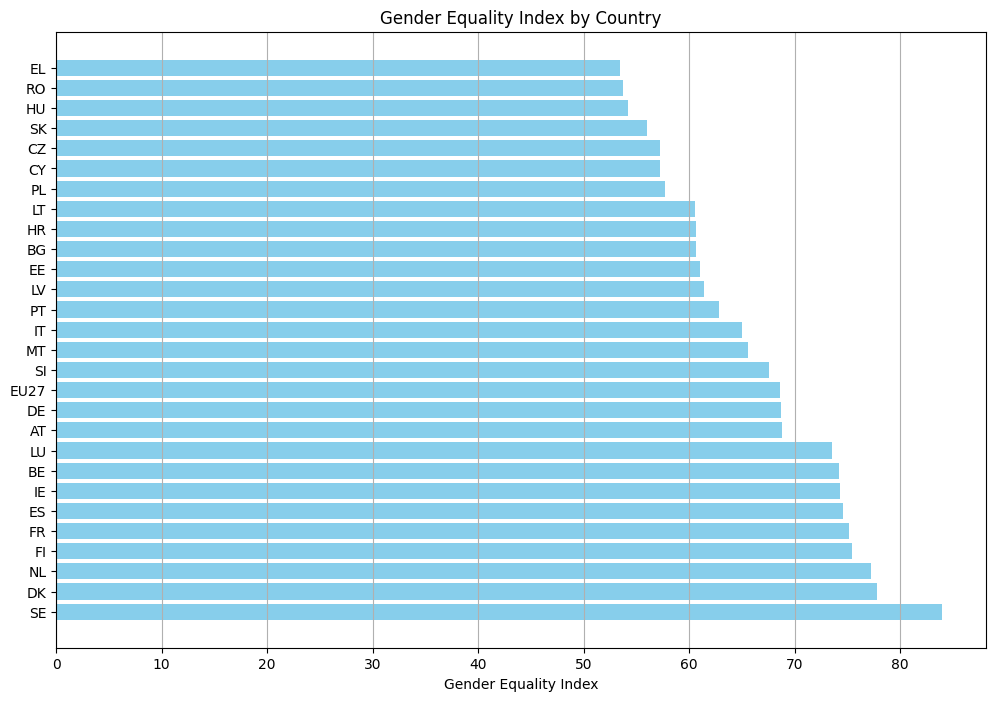

In [ ]:
import matplotlib.pyplot as plt

# Sort the DataFrame by Gender Equality Index
df_sorted = df.sort_values(by='Gender Equality Index', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.barh(df_sorted['Country'], df_sorted['Gender Equality Index'], color='skyblue')
plt.xlabel('Gender Equality Index')
plt.title('Gender Equality Index by Country')
plt.grid(axis='x')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import ipywidgets as widgets
from IPython.display import display

# Sample DataFrame
data = {
    'WORK': np.random.rand(100),
    'MONEY': np.random.rand(100),
    'KNOWLEDGE': np.random.rand(100),
    'TIME': np.random.rand(100),
    'POWER': np.random.rand(100),
    'HEALTH': np.random.rand(100),
    'Gender Equality Index': np.random.rand(100)
}
df = pd.DataFrame(data)

# Define Linear Regression Model
model = LinearRegression()

# Preprocessing: Normalize features
features = ['WORK', 'MONEY', 'KNOWLEDGE', 'TIME', 'POWER', 'HEALTH']
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(df[features])
X = scaler.transform(df[features])
y = df['Gender Equality Index']
model.fit(X, y)

# Create input widgets
input_sliders = {}
for feature in features:
    input_sliders[feature] = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description=feature+':')

submit_button = widgets.Button(description='Submit')

# Output widget
output = widgets.Output()

# Function to handle submission
def on_submit_clicked(b):
    with output:
        output.clear_output()
        # Get input values
        input_values = [input_sliders[feature].value for feature in features]

        # Scale input values
        input_data = scaler.transform([input_values])

        # Predict Gender Equality Index
        predicted_index = model.predict(input_data)[0]

        # Display predicted index
        print(f'Predicted Gender Equality Index: {predicted_index}')

# Assign function to button click event
submit_button.on_click(on_submit_clicked)

# Display UI
input_widgets = widgets.VBox(list(input_sliders.values()))
display(widgets.VBox([input_widgets, submit_button, output]))


Enrollment Rates in Primary, Secondary, and Tertiary Education by Gender:



In [ ]:
# Example code for calculating enrollment rates
total_population = 1000  # Example total population
enrolled_primary_male = 800  # Example number of males enrolled in primary education
enrolled_secondary_male = 600  # Example number of males enrolled in secondary education
enrolled_tertiary_male = 400  # Example number of males enrolled in tertiary education
enrolled_primary_female = 850  # Example number of females enrolled in primary education
enrolled_secondary_female = 700  # Example number of females enrolled in secondary education
enrolled_tertiary_female = 450  # Example number of females enrolled in tertiary education

# Calculate enrollment rates
enrollment_rate_primary_male = enrolled_primary_male / total_population
enrollment_rate_secondary_male = enrolled_secondary_male / total_population
enrollment_rate_tertiary_male = enrolled_tertiary_male / total_population
enrollment_rate_primary_female = enrolled_primary_female / total_population
enrollment_rate_secondary_female = enrolled_secondary_female / total_population
enrollment_rate_tertiary_female = enrolled_tertiary_female / total_population

print("Enrollment Rates by Gender:")
print("Primary Education - Male:", enrollment_rate_primary_male)
print("Primary Education - Female:", enrollment_rate_primary_female)
print("Secondary Education - Male:", enrollment_rate_secondary_male)
print("Secondary Education - Female:", enrollment_rate_secondary_female)
print("Tertiary Education - Male:", enrollment_rate_tertiary_male)
print("Tertiary Education - Female:", enrollment_rate_tertiary_female)


Enrollment Rates by Gender:
Primary Education - Male: 0.8
Primary Education - Female: 0.85
Secondary Education - Male: 0.6
Secondary Education - Female: 0.7
Tertiary Education - Male: 0.4
Tertiary Education - Female: 0.45


Literacy Rates by Gender:


In [ ]:
# Example code for calculating literacy rates
total_population = 1000  # Example total population
literate_male = 900  # Example number of literate males
literate_female = 950  # Example number of literate females

# Calculate literacy rates
literacy_rate_male = literate_male / total_population
literacy_rate_female = literate_female / total_population

print("Literacy Rates by Gender:")
print("Male:", literacy_rate_male)
print("Female:", literacy_rate_female)


Literacy Rates by Gender:
Male: 0.9
Female: 0.95


Gender Parity Index in Education:

In [ ]:
# Example code for calculating Gender Parity Index
enrollment_rate_male = 0.85  # Example enrollment rate for males
enrollment_rate_female = 0.90  # Example enrollment rate for females

# Calculate Gender Parity Index
gpi = enrollment_rate_female / enrollment_rate_male

print("Gender Parity Index in Education:", gpi)


Gender Parity Index in Education: 1.0588235294117647


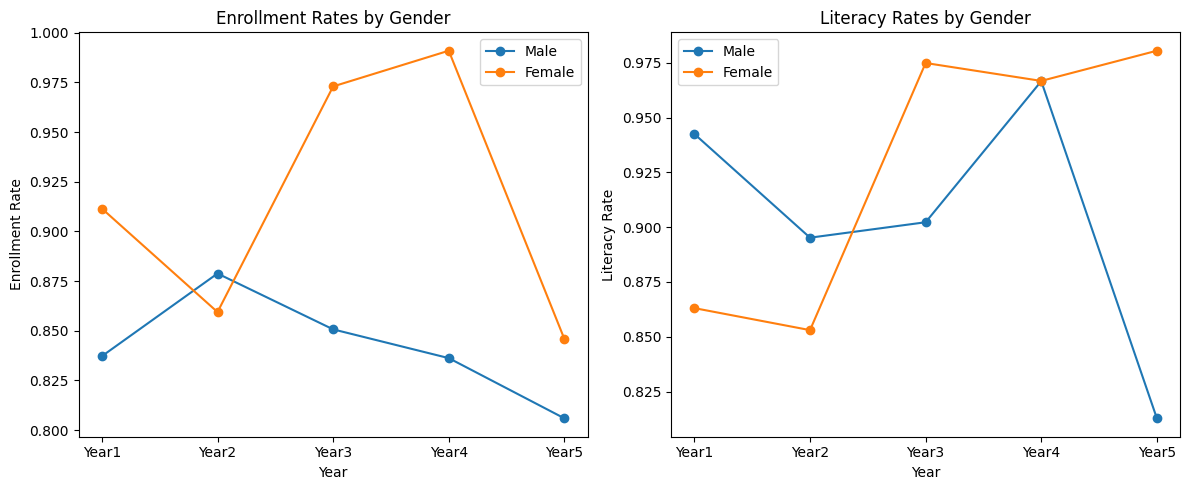

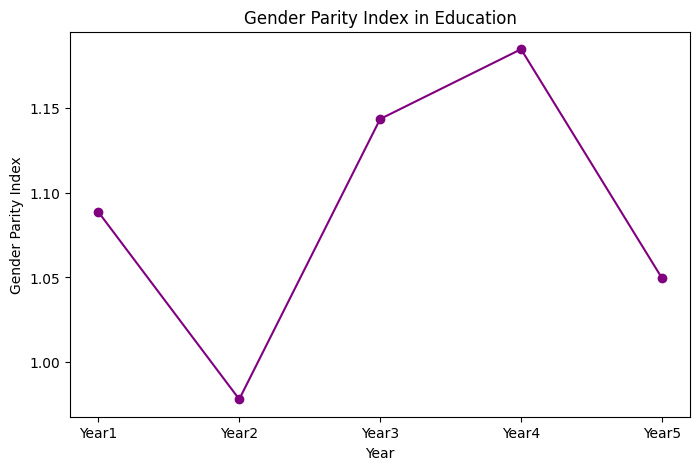

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)

# Sample data for 5 years
years = ['Year1', 'Year2', 'Year3', 'Year4', 'Year5']
enrollment_male = np.random.uniform(0.7, 0.95, size=(5,))
enrollment_female = np.random.uniform(0.75, 1.0, size=(5,))
literacy_male = np.random.uniform(0.8, 0.98, size=(5,))
literacy_female = np.random.uniform(0.85, 1.0, size=(5,))

# Calculate Gender Parity Index
gpi = enrollment_female / enrollment_male

# Create DataFrame
data = {
    'Year': years,
    'Enrollment Rate - Male': enrollment_male,
    'Enrollment Rate - Female': enrollment_female,
    'Literacy Rate - Male': literacy_male,
    'Literacy Rate - Female': literacy_female,
    'Gender Parity Index': gpi
}
df = pd.DataFrame(data)

# Data visualization
plt.figure(figsize=(12, 5))

# Enrollment rates visualization
plt.subplot(1, 2, 1)
plt.plot(df['Year'], df['Enrollment Rate - Male'], marker='o', label='Male')
plt.plot(df['Year'], df['Enrollment Rate - Female'], marker='o', label='Female')
plt.title('Enrollment Rates by Gender')
plt.xlabel('Year')
plt.ylabel('Enrollment Rate')
plt.legend()

# Literacy rates visualization
plt.subplot(1, 2, 2)
plt.plot(df['Year'], df['Literacy Rate - Male'], marker='o', label='Male')
plt.plot(df['Year'], df['Literacy Rate - Female'], marker='o', label='Female')
plt.title('Literacy Rates by Gender')
plt.xlabel('Year')
plt.ylabel('Literacy Rate')
plt.legend()

plt.tight_layout()
plt.show()

# Gender Parity Index visualization
plt.figure(figsize=(8, 5))
plt.plot(df['Year'], df['Gender Parity Index'], marker='o', color='purple')
plt.title('Gender Parity Index in Education')
plt.xlabel('Year')
plt.ylabel('Gender Parity Index')
plt.show()


Statistical analysis

In [ ]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)


       Enrollment Rate - Male  Enrollment Rate - Female  Literacy Rate - Male  \
count                5.000000                  5.000000              5.000000   
mean                 0.841765                  0.916118              0.903871   
std                  0.026400                  0.065190              0.058743   
min                  0.805914                  0.845860              0.812786   
25%                  0.836221                  0.859397              0.895201   
50%                  0.837203                  0.911474              0.902248   
75%                  0.850691                  0.972943              0.942511   
max                  0.878797                  0.990916              0.966607   

       Literacy Rate - Female  Gender Parity Index  
count                5.000000             5.000000  
mean                 0.927644             1.088981  
std                  0.063817             0.080779  
min                  0.853033             0.977924  
25%  

## Select relevant features and target variable:

In [ ]:
features = df[['Enrollment Rate - Male', 'Enrollment Rate - Female',
               'Literacy Rate - Male', 'Literacy Rate - Female']]
target = df['Gender Parity Index']

## Split the data into training and testing sets:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



Training R^2 Score: 1.0
Testing R^2 Score: nan


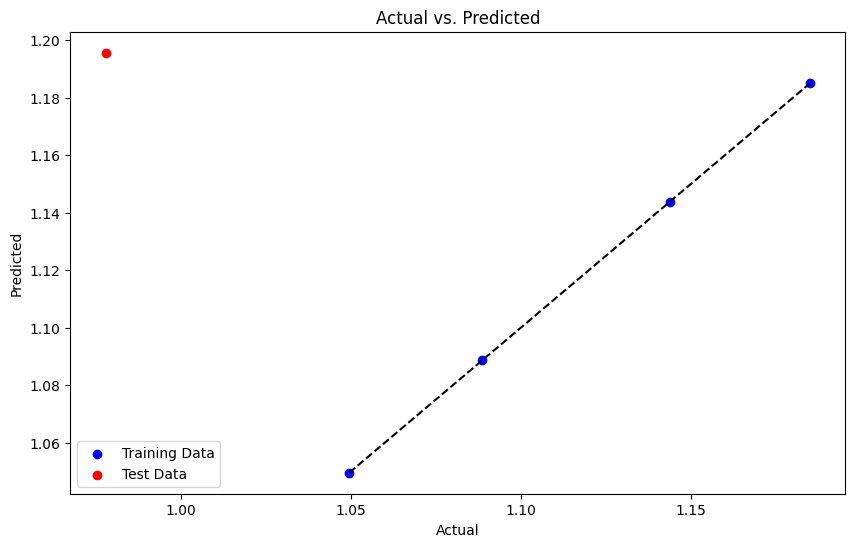

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(X_train, y_train)

r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

print("Training R^2 Score:", r2_train)
print("Testing R^2 Score:", r2_test)

# Plotting actual vs. predicted values
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))

# Plotting training data
plt.scatter(y_train, y_train_pred, color='blue', label='Training Data')

# Plotting test data
plt.scatter(y_test, y_test_pred, color='red', label='Test Data')

# Plotting the diagonal line
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linestyle='--')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()


## Create a function to predict gender equality for unseen instances:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



Linear Regression:
  Training R^2 Score: 1.0
  Testing R^2 Score: nan
  Mean Squared Error: 0.0473823716720323

Decision Tree:
  Training R^2 Score: 1.0
  Testing R^2 Score: nan
  Mean Squared Error: 0.012274077594275706



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



Random Forest:
  Training R^2 Score: 0.8286314287347547
  Testing R^2 Score: nan
  Mean Squared Error: 0.015454315946043655

Support Vector Machine:
  Training R^2 Score: -0.00010697095929113054
  Testing R^2 Score: nan
  Mean Squared Error: 0.019420136674573207



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



K-Nearest Neighbors:
  Training R^2 Score: 0.3784586820913357
  Testing R^2 Score: nan
  Mean Squared Error: 0.013472818681981621



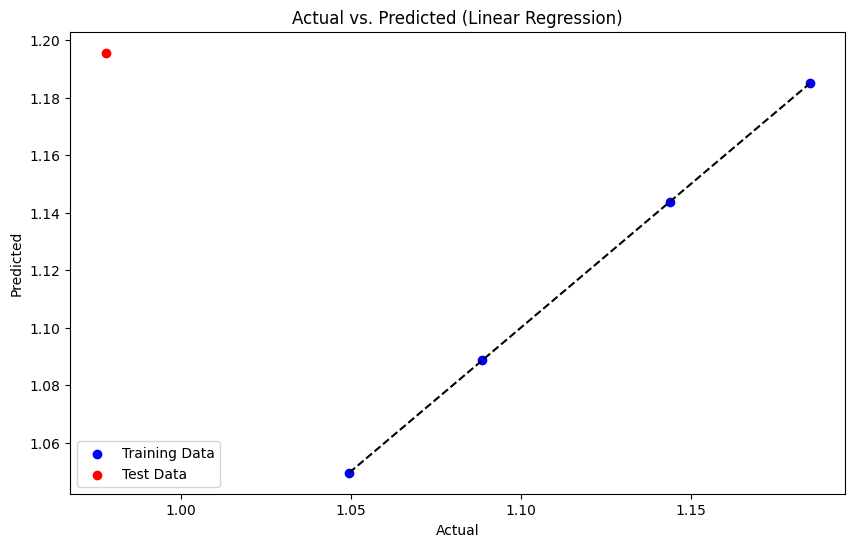

In [ ]:
def predict_gender_equality(participation, segregation_quality, financial_resources, economic_situation,
                            attainment_participation, segregation, care_activities, social_activities,
                            political, economic, social, status, behaviour, access):

    new_instance = pd.DataFrame([[participation, segregation_quality, financial_resources, economic_situation,
                                   attainment_participation, segregation, care_activities, social_activities,
                                   political, economic, social, status, behaviour, access]],
                                 columns=['Participation', 'Segregation and quality of work', 'Financial resources',
                                          'Economic situation', 'Attainment and participation', 'Segregation',
                                          'Care activities', 'Social activities', 'Political', 'Economic', 'Social',
                                          'Status', 'Behaviour', 'Access'])

    predicted_gender_equality = model.predict(new_instance)
    return predicted_gender_equality

# Comparisons

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



Linear Regression:
  Training R^2 Score: 1.0
  Testing R^2 Score: nan
  Mean Squared Error: 0.0473823716720323

Decision Tree:
  Training R^2 Score: 1.0
  Testing R^2 Score: nan
  Mean Squared Error: 0.012274077594275706



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



Random Forest:
  Training R^2 Score: 0.8123077083453589
  Testing R^2 Score: nan
  Mean Squared Error: 0.017782190055919855

Support Vector Machine:
  Training R^2 Score: -0.00010697095929113054
  Testing R^2 Score: nan
  Mean Squared Error: 0.019420136674573207

K-Nearest Neighbors:
  Training R^2 Score: 0.3784586820913357
  Testing R^2 Score: nan
  Mean Squared Error: 0.013472818681981621



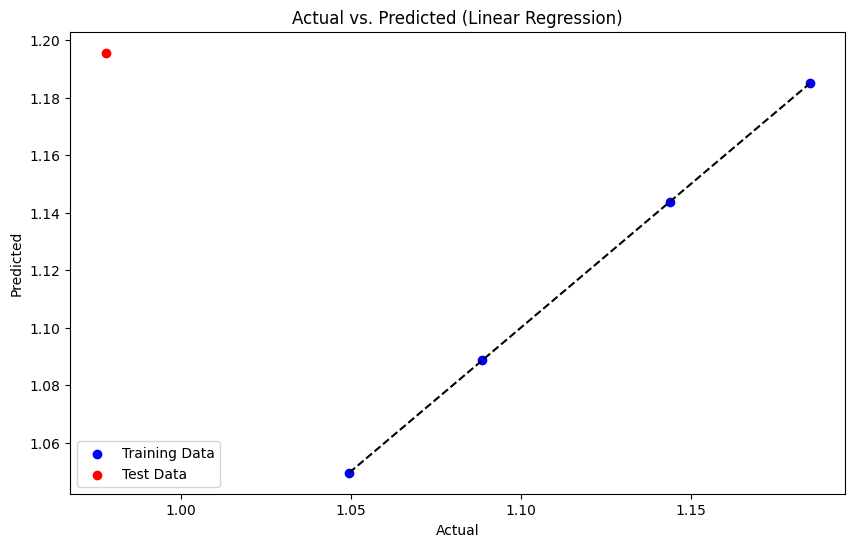

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize other models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=3)  # Adjust n_neighbors as needed
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name}:")
    print("  Training R^2 Score:", train_score)
    print("  Testing R^2 Score:", test_score)
    print("  Mean Squared Error:", mse)
    print()

# Plotting actual vs. predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training Data')
plt.scatter(y_test, y_test_pred, color='red', label='Test Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (Linear Regression)')
plt.legend()
plt.show()


# Test for an unseen instances

'Participation', 'Segregation and quality of work', 'Financial resources', 'Economic situation','Attainment and participation', 'Segregation', 'Care activities', 'Social activities','Political', 'Economic', 'Social', 'Status', 'Behaviour', 'Access'


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Function to predict gender equality index
def predict_gender_equality(participation, segregation_quality, financial_resources,
                            economic_situation, attainment_participation, segregation,
                            care_activities, social_activities, political, economic,
                            social, status, behaviour, access):
    # Your prediction logic here
    input_values = [participation, segregation_quality, financial_resources,
                    economic_situation, attainment_participation, segregation,
                    care_activities, social_activities, political, economic,
                    social, status, behaviour, access]
    predicted_index = sum(input_values) / len(input_values)
    return predicted_index

# Create input widgets
input_widgets = []
feature_names = ['Participation', 'Segregation and quality of work', 'Financial resources',
                'Economic situation', 'Attainment and participation', 'Segregation',
                'Care activities', 'Social activities', 'Political', 'Economic',
                'Social', 'Status', 'Behaviour', 'Access']
for feature in feature_names:
    input_widgets.append(widgets.FloatText(value=0.5, min=0, max=1, step=0.01, description=feature,
                                           tooltip=f"Enter a value between 0 and 1 for {feature}",
                                           layout=widgets.Layout(width='auto', margin='auto')))

# Arrange input widgets in two columns
input_widgets_left = input_widgets[:len(input_widgets)//2]
input_widgets_right = input_widgets[len(input_widgets)//2:]
input_widgets_rows = [widgets.HBox([left, right], layout=widgets.Layout(width='auto', margin='auto'))
                      for left, right in zip(input_widgets_left, input_widgets_right)]

# Create submit button
submit_button = widgets.Button(description='Submit', layout=widgets.Layout(width='auto', margin='auto'))

# Output widget for displaying prediction
output_label = widgets.Label(layout=widgets.Layout(width='auto', margin='auto'))

# Output widget for descriptive statistics
output_descriptive_stats = widgets.Output(layout=widgets.Layout(width='auto', margin='auto'))

# Event handler for submit button
def on_submit_button_clicked(b):
    # Get input values
    input_values = []
    for row in input_widgets_rows:
        for widget in row.children:
            input_values.append(max(0, widget.value))  # Ensure non-negative values

    # Predict gender equality index
    predicted_index = predict_gender_equality(*input_values)

    # Display prediction
    output_label.value = f"Predicted Gender Equality Index: {predicted_index:.2f}"

    # Display descriptive statistics
    with output_descriptive_stats:
        output_descriptive_stats.clear_output()
        df = pd.DataFrame({'Feature': feature_names, 'Value': input_values})
        descriptive_stats = df.describe()
        display(descriptive_stats)

# Attach event handler to submit button
submit_button.on_click(on_submit_button_clicked)

input_column = widgets.VBox(input_widgets_rows + [submit_button], layout=widgets.Layout(width='auto', margin='auto'))
output_column = widgets.VBox([output_label, output_descriptive_stats], layout=widgets.Layout(width='auto', margin='auto'))

ui = widgets.VBox([input_column, output_column], layout=widgets.Layout(width='auto', margin='auto'))
display(ui)


from matplotlib import pyplot as plt
_df_0['Value'].plot(kind='hist', bins=20, title='Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Value'].plot(kind='line', figsize=(8, 4), title='Value')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Value', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)